# **Fish_classification_bootcamp_project**

**PROJENİN AMACI**
Derin öğrenme tekniklerini kullanarak farklı balık türlerini görüntülerinden doğru bir şekilde sınıflandırmak. Bu proje, görüntü işleme ve yapay zeka alanlarında önemli bir uygulama örneği olup, balıkçılık, deniz biyolojisi ve su ürünleri yetiştiriciliği gibi alanlarda çeşitli uygulamalara sahip olabilir.

**PROJE KAPSAMI**

Veri Toplama: Çeşitli balık türlerinden yüksek kaliteli görüntüler toplamak ve bu görüntüleri sınıflandırmak için gerekli etiketleme işlemlerini yapmak.
Veri Ön İşleme: Toplanan görüntüleri standart hale getirmek için boyutlandırma, normalizasyon ve gürültü giderme gibi işlemleri uygulamak.
Model Oluşturma: Konvolüsyonel Sinir Ağları (CNN) gibi derin öğrenme modelleri kullanarak bir sınıflandırma modeli geliştirmek.
Model Eğitimi: Oluşturulan modeli, toplanan veri seti üzerinde eğiterek balık türlerini ayırt edebilme yeteneğini geliştirmek.
Model Değerlendirmesi: Eğitilen modelin performansını çeşitli metrikler (doğruluk, hassasiyet, özgüllük) kullanarak değerlendirmek.
Sonuçların Değerlendirilmesi: Elde edilen sonuçları analiz etmek ve modelin güçlü ve zayıf yönlerini belirlemek.

**BEKLENEN SONUÇLAR***

Farklı balık türlerini yüksek doğrulukla sınıflandırabilen bir derin öğrenme modeli.
Modelin performansını gösteren detaylı bir rapor.
Proje boyunca öğrenilenler ve gelecekteki çalışmalar için öneriler.

**PROJENİN ÖNEMİ**

Bilimsel Araştırmalar: Deniz biyolojisi, balıkçılık ve su ürünleri yetiştiriciliği gibi alanlarda bilimsel araştırmalara katkı sağlamak.
Endüstriyel Uygulamalar: Balıkçılık sektöründe balık türlerinin otomatik olarak tanınması ve sınıflandırılması için kullanılmak.
Çevre Koruma: Su ekosistemlerinin izlenmesi ve korunması için kullanılmak.
Kullanılabilecek Teknolojiler:

Programlama Dili: Python (TensorFlow veya PyTorch gibi derin öğrenme kütüphaneleri ile birlikte)
Veri Seti: Özel olarak oluşturulmuş veya kamuya açık veri setleri (örneğin, ImageNet)
Derin Öğrenme Modelleri: CNN, ResNet, VGG gibi önceden eğitilmiş modeller veya özel olarak tasarlanmış modeller

**PROJE SÜRECİ**

Literatür Araştırması: Benzer çalışmaları incelemek ve güncel gelişmeleri takip etmek.
Veri Toplama ve Hazırlık: Veri setini oluşturmak ve ön işlemler uygulamak.
Model Oluşturma ve Eğitim: Derin öğrenme modelini oluşturmak ve eğitmek.
Model Değerlendirmesi: Modelin performansını değerlendirmek.
Sonuçların Analizi ve Raporlama: Sonuçları yorumlamak ve raporlamak.


# **Gerekli Kütüphane ve Veri Setlerinin Yüklenmesi**

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/a-large-scale-fish-dataset/Segmentation_example_script.m
/kaggle/input/a-large-scale-fish-dataset/README.txt
/kaggle/input/a-large-scale-fish-dataset/license.txt
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00033.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00004.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00023.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00041.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00024.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00035.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00045.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00038.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00025.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/0000

# **Veri Önişleme Süreci**

In [2]:
label = []
path = []
fish_dir = '/kaggle/input/a-large-scale-fish-dataset'
for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.png':
            if dir_name.split()[-1]!='GT':
                label.append(os.path.split(dir_name)[-1])
                path.append(os.path.join(dir_name, filename))
                
        
data = pd.DataFrame(columns=['path', 'label'])
data['path'] = path
data['label'] = label

# **Veri Setinin İçeriği**

In [3]:
data.head() 

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
1,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
2,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
3,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
4,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat


In [4]:
data.tail()

,path,label
9276,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
9277,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
9278,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
9279,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
9280,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream


# **Verileri NumPy Dizisine Dönüştürme**

Görüntü verilerinin makine öğrenmesi ve derin öğrenme projelerinde kullanılabilmesi için, normalizasyon işlemi uygulanarak verilerin numpy dizisine dönüştürülmesi gerekmektedir.

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(df, target_size=(28, 28)):
    images = []
    labels = []
    for index, row in df.iterrows():
        img = load_img(row['path'], target_size=target_size)
        img = img_to_array(img)
        img = img / 255.0  # Normalizasyon
        images.append(img)
        labels.append(row['label'])
    return np.array(images), np.array(labels)

In [6]:
X, y = load_images(data)

# **Verileri Eğitim ve Test Kümelerine Bölme**

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (7424, 28, 28, 3)
X_test shape: (1857, 28, 28, 3)
y_train shape: (7424,)
y_test shape: (1857,)


# **Görselleştirme**

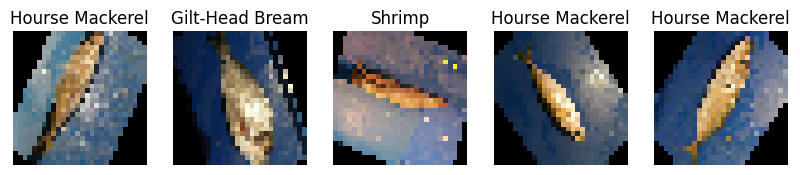

In [9]:
import matplotlib.pyplot as plt

def plot_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'{labels[i]}')
        plt.axis('off')
    plt.show()
    
plot_images(X_train, y_train, num_images=5) 

# **Sadeleştirme Yapma**
Sadeleştirme, çok boyutlu bir veri yapısını tek boyutlu bir diziye dönüştürme işlemidir. Bu genellikle derin öğrenme modellerinde giriş katmanına sağlanan verileri hazırlamak için yapılır.

In [10]:
# X_train dizisi (7424, 28, 28, 3) boyutunda
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 3)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 3)).astype('float32') / 255


print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (7424, 2352)
X_test shape: (1857, 2352)


In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
print('y_train shape:', y_train.shape)
print('y_train sample:', y_train[:5])

print('y_val shape:', y_train.shape)
print('y_val sample:', y_val[:5])

print('y_test shape:', y_train.shape)
print('y_test sample:', y_test[:5])

y_train shape: (5939,)
y_train sample: ['Red Sea Bream' 'Black Sea Sprat' 'Trout' 'Gilt-Head Bream' 'Sea Bass']
y_val shape: (5939,)
y_val sample: ['Gilt-Head Bream' 'Shrimp' 'Gilt-Head Bream' 'Shrimp' 'Red Mullet']
y_test shape: (5939,)
y_test sample: ['Black Sea Sprat' 'Trout' 'Red Mullet' 'Shrimp' 'Hourse Mackerel']


In [13]:
y_train = np.where(y_train == 'Gilt Head Bream', 'Gilt-Head Bream', y_train)
y_val = np.where(y_val == 'Gilt Head Bream', 'Gilt-Head Bream', y_val)
y_test = np.where(y_test == 'Gilt Head Bream', 'Gilt-Head Bream', y_test)

# **Etiket Kodlaması ve Tek Kodlama İşlemi**

Etiket kodlaması, kategorik etiketleri sayısal değerlere dönüştürmek için kullanılır. Tek kodlama, her etiket için bir vektör oluşturur.

In [14]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Label encoding işlemi
label_encoder = LabelEncoder()

# Y_train, Y_val ve Y_test için label encoding uygulanması
y_train_encoded = label_encoder.fit_transform(y_train)  
y_val_encoded = label_encoder.transform(y_val)          
y_test_encoded = label_encoder.transform(y_test)        

y_train = tf.keras.utils.to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
y_val = tf.keras.utils.to_categorical(y_val_encoded, num_classes=len(label_encoder.classes_))
y_test = tf.keras.utils.to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

# Yeni boyutların kontroL
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

# Örnekler
print('y_train sample:', y_train[:5])
print('y_val sample:', y_val[:5])
print('y_test sample:', y_test[:5])

print(type(y_train))
print(type(y_val))
print(type(y_test))

y_train shape: (5939, 10)
y_val shape: (1485, 10)
y_test shape: (1857, 10)
y_train sample: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
y_val sample: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
y_test sample: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# **Modeli Yaratma**

In [15]:
model = tf.keras.models.Sequential()

In [16]:
model.add(tf.keras.layers.Input(shape=(28 * 28 * 3,)))

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

In [17]:
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(256, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.4))

In [18]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Modeli Test Etme**

Modelin eğitim sürecini daha verimli hale getirmek için erken durdurma tekniği kullanılır. Bu teknik, modelin doğrulama kaybının eğitim süresi boyunca duraklayıp duraklamadığını veya kötüleşip kötüleşmediğini izler. Aşırı öğrenmeyi önlemeye yardımcı olur.

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
results = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.1106 - loss: 2.2740 - val_accuracy: 0.1064 - val_loss: 2.2193
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1323 - loss: 2.2146 - val_accuracy: 0.2350 - val_loss: 2.0620
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2054 - loss: 2.0385 - val_accuracy: 0.2411 - val_loss: 1.8687
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2369 - loss: 1.9009 - val_accuracy: 0.2822 - val_loss: 1.7747
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3192 - loss: 1.7623 - val_accuracy: 0.4121 - val_loss: 1.5974
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3525 - loss: 1.6604 - val_accuracy: 0.4189 - val_loss: 1.5012
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4096 - loss: 1.5527 - val_accuracy: 0.4646 - val_loss: 1.4025
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4614 - loss: 1.4342 - val_accuracy: 0.4909 - v

# **Eğitim Sürecinin Grafikleri**

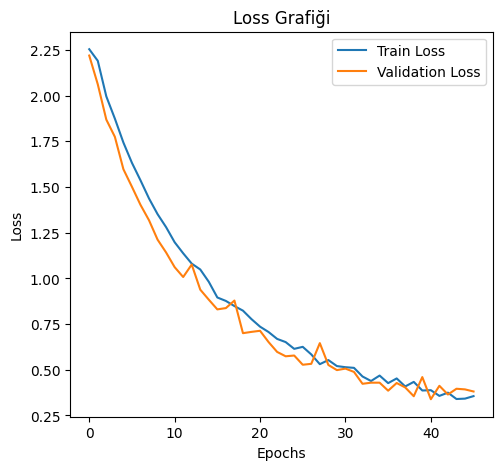

In [21]:
plt.figure(figsize=(12, 5))

# Loss grafiği
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Loss Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

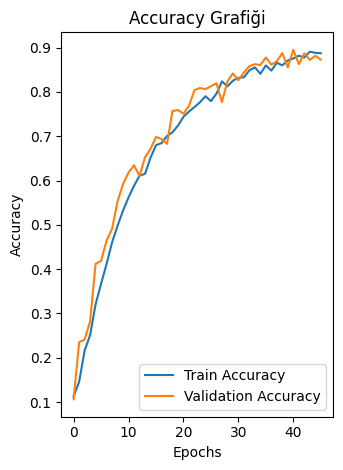

In [22]:
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


# **Modeli Değerlendirme**

In [24]:
#Modelin değerlendirilmesi
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Kaybı:', test_loss)
print('Test Doğruluğu:', test_accuracy)

Test Kaybı: 0.4487755298614502
Test Doğruluğu: 0.8567582368850708
